In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar, minimize
%matplotlib inline

In [130]:
data = pd.read_csv('weights_heights.csv', index_col='Index')

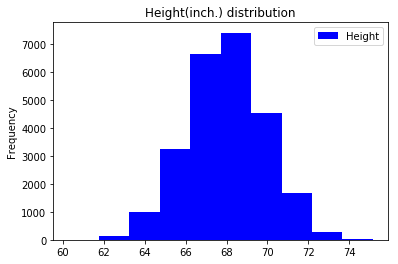

In [131]:
data.plot(y='Height', kind='hist', color='blue', title='Height(inch.) distribution')

In [132]:
data.head(5)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971


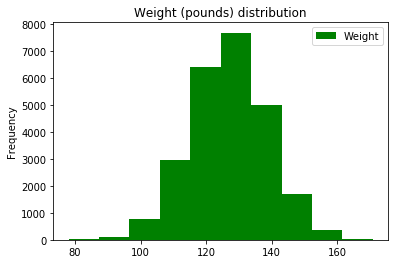

In [133]:
data.plot(y="Weight", kind='hist', color='green', title="Weight (pounds) distribution" )

In [134]:
def make_bmi(height_inch, weight_pound):
    METER_TO_INCH, KILO_TO_POUND = 39.37, 2.20462
    return (weight_pound / KILO_TO_POUND) / \
           (height_inch / METER_TO_INCH) ** 2

In [135]:
data['BMI'] = data.apply(lambda row: make_bmi(row['Height'], 
                                              row['Weight']), axis=1)

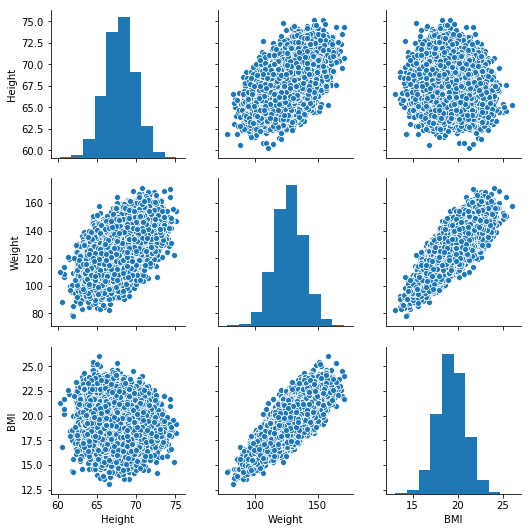

In [136]:
sns.pairplot(data)

[Text(0, 0.5, 'Рост'), Text(0.5, 0, 'Весовая категория')]

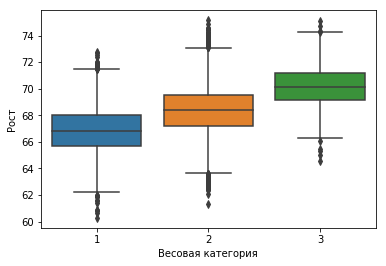

In [137]:
def weight_category(weight):
    if weight < 120:
        return 1
    elif weight >= 150:
        return 3
    else:
        return 2


data['weight_cat'] = data['Weight'].apply(weight_category)
bp = sns.boxplot(y=data['Height'], x=data['weight_cat'])
bp.set(xlabel='Весовая категория', ylabel='Рост')


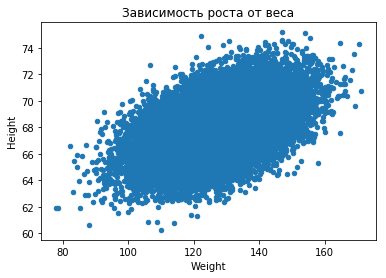

In [147]:
data.plot(x="Weight", y="Height", kind='scatter', title="Зависимость роста от веса")

In [139]:
def error(w0, w1):
    sum = 0
    for i in range(1,len(data["Height"])+1,1):
        sum += ((data['Height'][i]-(w0 + w1*data["Weight"][i])))**2
    return sum


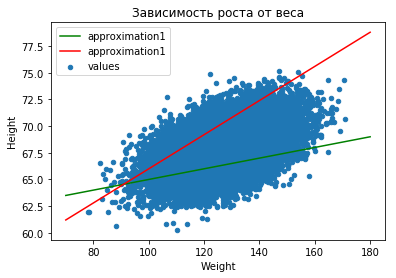

In [140]:
data.plot(x="Weight", y="Height", kind='scatter', title="Зависимость роста от веса",label="values")
x = np.linspace(70,180,250)
w0, w1 = 60, 0.05
y = [w1*i+w0 for i in x]
w0, w1 = 50, 0.16
y1 = [w1*i+w0 for i in x]
plt.plot(x,y,color="green",label = "approximation1")
plt.plot(x,y1,color="red",label = "approximation1")
plt.legend()

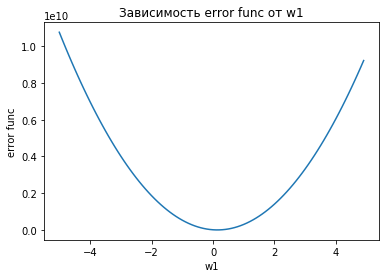

In [141]:
fig, ax = plt.subplots()
x = np.arange(-5,5,0.1)
y = [error(50, i) for i in x]
ax.plot(x, y)
ax.set(xlabel="w1", ylabel="error func", title = "Зависимость error func от w1")
plt.show()

In [142]:
res = minimize_scalar(fun = lambda w1: error(50., w1), method = 'bounded', bounds = (-5, 5))
opt_w1 = res.x

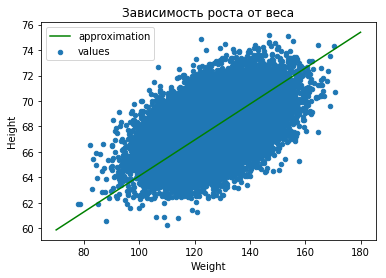

In [143]:
data.plot(x="Weight", y="Height", kind='scatter', title="Зависимость роста от веса",label="values")
x = np.linspace(70,180,250)
w0 = 50
y = [opt_w1*i+w0 for i in x]
plt.plot(x,y,color="green",label = "approximation")
plt.legend()

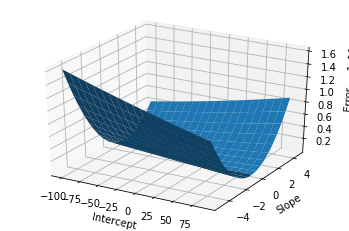

In [144]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.gca(projection='3d') # get current axis

w0 = np.arange(-100, 100, 10)
w1 = np.arange(-5, 5, 0.5)
w0, w1 = np.meshgrid(w0, w1)
Z = error(w0,w1)

surf = ax.plot_surface(w0, w1, Z)
ax.set_xlabel('Intercept')
ax.set_ylabel('Slope')
ax.set_zlabel('Error')
plt.show()

In [145]:
def error(w):
    sum = 0
    for i in range(1,len(data["Height"])+1,1):
        sum += ((data['Height'][i]-(w[0] + w[1]*data["Weight"][i])))**2
    return sum
res = minimize(error,(0,0), method='L-BFGS-B',bounds=((-100,100),(-5,5)))

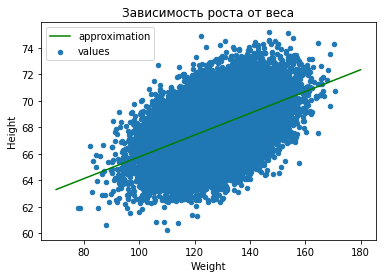

In [146]:
data.plot(x="Weight", y="Height", kind='scatter', title="Зависимость роста от веса",label="values")
x = np.linspace(70,180,250)
y = [res.x[1]*i + res.x[0] for i in x]
plt.plot(x,y,color="green",label = "approximation")
plt.legend()